<a href="https://colab.research.google.com/github/mandelatrey/ML/blob/main/Implementing_ML_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing modules

In [5]:
!pip install 'transformers[torch]'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 101.4 MB/s eta 0:00:00


In [6]:
!pip install accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 kB 6.5 MB/s eta 0:00:00


Initialise model

In [7]:
from transformers import pipeline
unmasker = pipeline('fill-mask', model='distilroberta-base')
print(unmasker("Hello I'm a <mask> model."))


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

[{'score': 0.04673680663108826, 'token': 265, 'token_str': ' business', 'sequence': "Hello I'm a business model."}, {'score': 0.03846096992492676, 'token': 18150, 'token_str': ' freelance', 'sequence': "Hello I'm a freelance model."}, {'score': 0.03308930993080139, 'token': 2734, 'token_str': ' fashion', 'sequence': "Hello I'm a fashion model."}, {'score': 0.0301900003105402, 'token': 774, 'token_str': ' role', 'sequence': "Hello I'm a role model."}, {'score': 0.021117402240633965, 'token': 24526, 'token_str': ' Playboy', 'sequence': "Hello I'm a Playboy model."}]


In [8]:
unmaskeds = unmasker("the square root of 4 is <mask>")
for unmasked in unmaskeds:
    print(unmasked)

{'score': 0.042400557547807693, 'token': 45436, 'token_str': ' undefined', 'sequence': 'the square root of 4 is undefined'}
{'score': 0.011404774151742458, 'token': 4276, 'token_str': ' zero', 'sequence': 'the square root of 4 is zero'}
{'score': 0.010262922383844852, 'token': 1528, 'token_str': ' true', 'sequence': 'the square root of 4 is true'}
{'score': 0.009787346236407757, 'token': 36498, 'token_str': ' exponential', 'sequence': 'the square root of 4 is exponential'}
{'score': 0.009137690998613834, 'token': 479, 'token_str': '.', 'sequence': 'the square root of 4 is.'}


#visualising the output

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.DataFrame(unmaskeds)
df

,score,token,token_str,sequence
0,0.042401,45436,undefined,the square root of 4 is undefined
1,0.011405,4276,zero,the square root of 4 is zero
2,0.010263,1528,true,the square root of 4 is true
3,0.009787,36498,exponential,the square root of 4 is exponential
4,0.009138,479,.,the square root of 4 is.


#Run cell to add custom text below

In [11]:
question = "the judges looked on as "

In [12]:
unmaskeds = unmasker(f"the judges looked on as the accussed <mask> the witness")
dfs = pd.DataFrame(unmaskeds)
sequence = dfs['sequence']
print(f'sequence : {sequence}')

sequence : 0    the judges looked on as the accussed hugged th...
1    the judges looked on as the accussed approache...
2    the judges looked on as the accussed awaited t...
3    the judges looked on as the accussed applauded...
4    the judges looked on as the accussed embraced ...
Name: sequence, dtype: object


Visualising output

[' hugged' ' approached' ' awaited' ' applauded' ' embraced']
0    the judges looked on as the accussed hugged th...
1    the judges looked on as the accussed approache...
2    the judges looked on as the accussed awaited t...
3    the judges looked on as the accussed applauded...
4    the judges looked on as the accussed embraced ...
Name: sequence, dtype: object


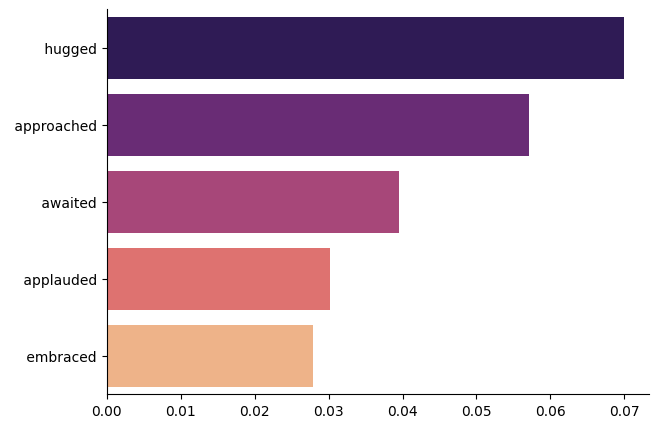

In [13]:
def chart(token_str, score):
    token_str_values = token_str
    score_values = score
    f, ax = plt.subplots(figsize=(7, 5))
    sns.despine(f)
    sns.barplot(x=score_values, y=token_str_values, data=dfs, palette='magma', orient='h')
    print(token_str_values)
    print(sequence)

chart(dfs['token_str'].values, dfs['score'].values)

#trying out Distilbeart Uncases, another model

In [14]:
from transformers import pipeline
unmasker2 = pipeline('fill-mask', model='distilbert-base-uncased')


In [15]:

unmaskers = unmasker2("they [MASK] as it wheezed past the comet.")
unmaskers_pd = pd.DataFrame(unmaskers)
for unmasker in unmaskers:
    print(unmasker['sequence'])

they watched as it wheezed past the comet.
they groaned as it wheezed past the comet.
they gasped as it wheezed past the comet.
they screamed as it wheezed past the comet.
they shuddered as it wheezed past the comet.


['watched' 'groaned' 'gasped' 'screamed' 'shuddered']
0    the judges looked on as the accussed hugged th...
1    the judges looked on as the accussed approache...
2    the judges looked on as the accussed awaited t...
3    the judges looked on as the accussed applauded...
4    the judges looked on as the accussed embraced ...
Name: sequence, dtype: object


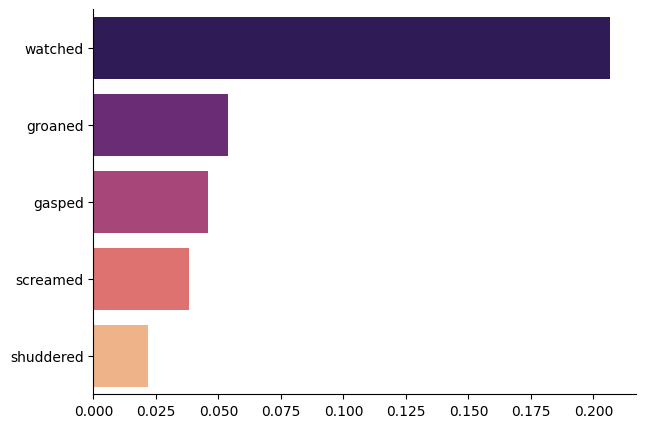

In [16]:
chart(unmaskers_pd['token_str'].values, unmaskers_pd['score'].values)

In [17]:
from transformers import DistilBertTokenizer, DistilBertModel
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained("distilbert-base-uncased")
text = "how come they saw it."
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [18]:
print(output)

BaseModelOutput(last_hidden_state=tensor([[[-0.06797, -0.00551,  0.09384,  ..., -0.02178,  0.33669,  0.12530],
         [ 0.24338,  0.16772,  0.19843,  ...,  0.11596,  0.30255,  0.10895],
         [ 0.10545,  0.01950,  0.42921,  ..., -0.34207,  0.02048,  0.04325],
         ...,
         [-0.20440, -0.24798, -0.10613,  ..., -0.02092,  0.01226,  0.04543],
         [ 0.49833, -0.16089, -0.37539,  ...,  0.22623, -0.19004, -0.73735],
         [ 0.88222,  0.22891, -0.12092,  ...,  0.08446, -0.34364, -0.55144]]], grad_fn=<NativeLayerNormBackward0>), hidden_states=None, attentions=None)


#table detection 

In [19]:
!pip install ultralyticsplus==0.0.23 ultralytics==8.0.21

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Ultralytics YOLOv8.0.21 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
image 1/1 /content/Screenshot 2023-04-12 at 14.20.11.png: 416x640 2 borderlesss, 13.8ms
Speed: 0.6ms pre-process, 13.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


tensor([[1.00000e+00, 1.35000e+02, 1.42000e+03, 7.94000e+02, 9.35052e-01, 1.00000e+00],
        [1.32000e+02, 0.00000e+00, 1.43300e+03, 1.38000e+02, 3.03559e-01, 1.00000e+00]], device='cuda:0')


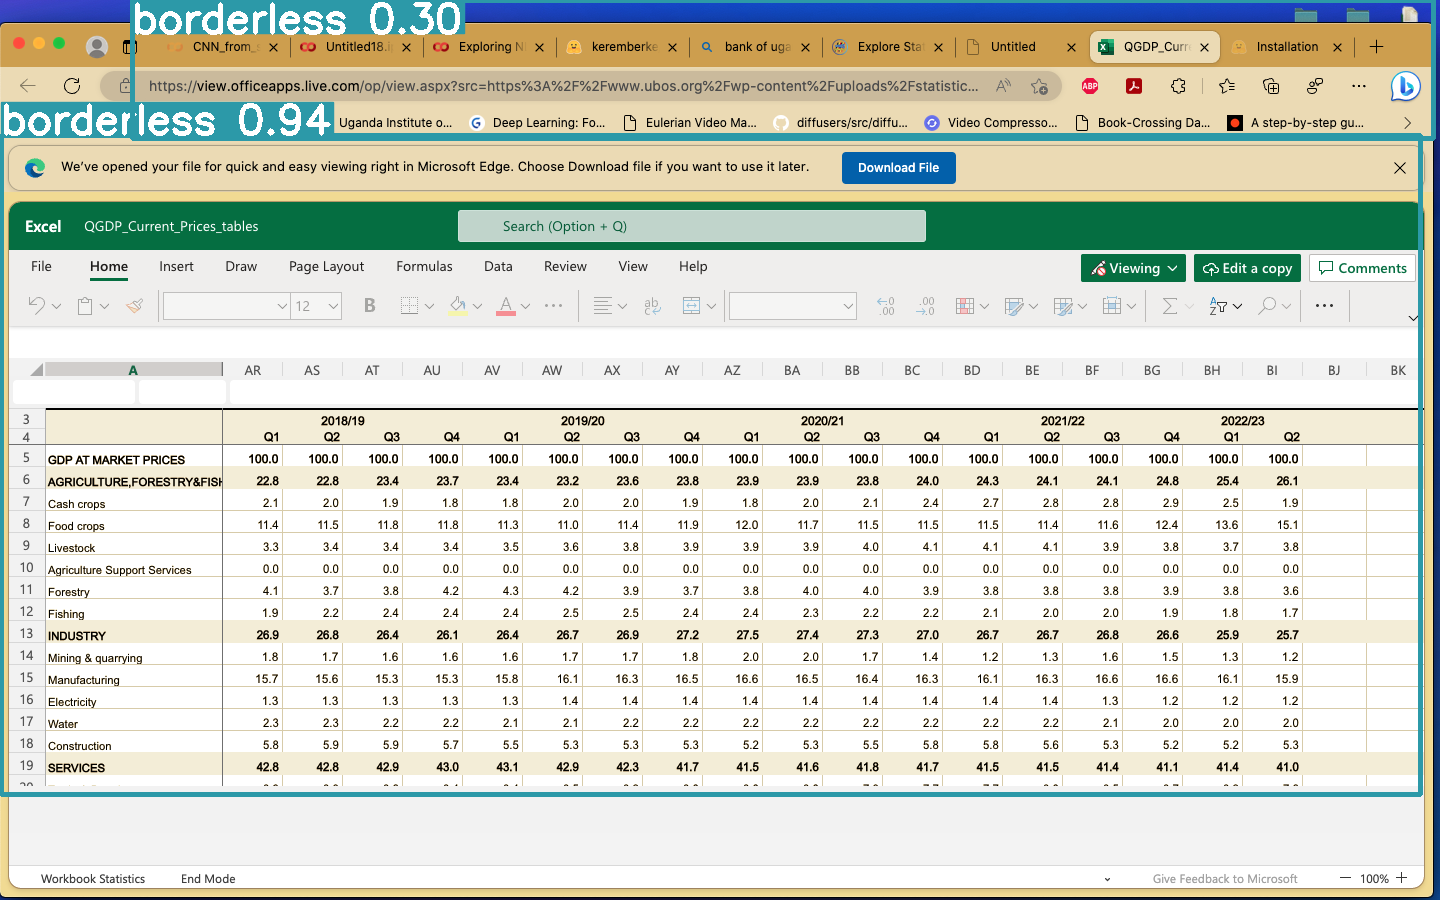

In [20]:
from ultralyticsplus import YOLO, render_result

# load model
model = YOLO('keremberke/yolov8s-table-extraction')

# set model parameters
model.overrides['conf'] = 0.25  # NMS confidence threshold
model.overrides['iou'] = 0.45  # NMS IoU threshold
model.overrides['agnostic_nms'] = False  # NMS class-agnostic
model.overrides['max_det'] = 1000  # maximum number of detections per image

# set image
image = '/content/Screenshot 2023-04-12 at 14.20.11.png'

# perform inference
results = model.predict(image)

# observe results
print(results[0].boxes)
render = render_result(model=model, image=image, result=results[0])
render.show()


In [21]:
print(results)

[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
type: <class 'torch.Tensor'>
shape: torch.Size([2, 6])
dtype: torch.float32
 + tensor([[1.00000e+00, 1.35000e+02, 1.42000e+03, 7.94000e+02, 9.35052e-01, 1.00000e+00],
        [1.32000e+02, 0.00000e+00, 1.43300e+03, 1.38000e+02, 3.03559e-01, 1.00000e+00]], device='cuda:0')]


In [28]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
import torchvision.models as models

import copy

#STyle Transfer in Pytroch


In [29]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [51]:
# desired size of the output image
imsize = 512 if torch.cuda.is_available() else 128  # use small size if no gpu

loader = transforms.Compose([
    transforms.Resize(imsize),  # scale imported image
    transforms.ToTensor()])  # transform it into a torch tensor


def image_loader(image_name):
    image = Image.open(image_name)
    # fake batch dimension required to fit network's input dimensions
    image = loader(image).unsqueeze(0)
    return image.to(device, torch.float)


style_img = image_loader("/content/sample_data/images/art_image.jpg")
content_img = image_loader("/content/sample_data/images/art_image1.jpg")

assert style_img.size() == content_img.size(), \
    "we need to import style and content images of the same size"

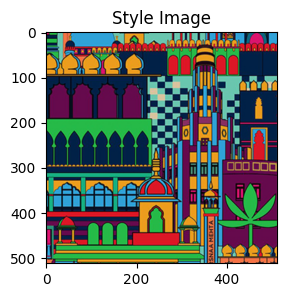

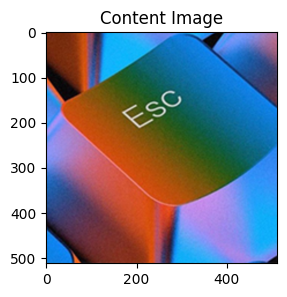

In [52]:
unloader = transforms.ToPILImage()  # reconvert into PIL image

plt.ion()

def imshow(tensor, title=None):
    image = tensor.cpu().clone()  # we clone the tensor to not do changes on it
    image = image.squeeze(0)      # remove the fake batch dimension
    image = unloader(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) # pause a bit so that plots are updated


plt.figure(figsize=(3,3))
imshow(style_img, title='Style Image')

plt.figure(figsize=(3,3))
imshow(content_img, title='Content Image')

In [53]:
class ContentLoss(nn.Module):

    def __init__(self, target,):
        super(ContentLoss, self).__init__()
        # we 'detach' the target content from the tree used
        # to dynamically compute the gradient: this is a stated value,
        # not a variable. Otherwise the forward method of the criterion
        # will throw an error.
        self.target = target.detach()

    def forward(self, input):
        self.loss = F.mse_loss(input, self.target)
        return input

In [39]:
def gram_matrix(input):
    a, b, c, d = input.size()  # a=batch size(=1), b=number of feature maps, (c,d)=dimensions of a f. map (N=c*d)
    features = input.view(a * b, c * d)  # resise F_XL into \hat F_XL
    G = torch.mm(features, features.t())  # compute the gram product
    # we 'normalize' the values of the gram matrix by dividing by the number of element in each feature maps.
    return G.div(a * b * c * d)

In [40]:
class StyleLoss(nn.Module):

    def __init__(self, target_feature):
        super(StyleLoss, self).__init__()
        self.target = gram_matrix(target_feature).detach()

    def forward(self, input):
        G = gram_matrix(input)
        self.loss = F.mse_loss(G, self.target)
        return input

#importing the VGG model

In [41]:
cnn = models.vgg19(pretrained=True).features.to(device).eval()

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:21<00:00, 26.7MB/s]


In [42]:
cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)

# create a module to normalize input image so we can easily put it in a nn.Sequential
class Normalization(nn.Module):
    def __init__(self, mean, std):
        super(Normalization, self).__init__()
        # .view the mean and std to make them [C x 1 x 1] so that they can directly work with image Tensor of shape [B x C x H x W].
        # B is batch size. C is number of channels. H is height and W is width.
        self.mean = torch.tensor(mean).view(-1, 1, 1)
        self.std = torch.tensor(std).view(-1, 1, 1)

    def forward(self, img):
        # normalize img
        return (img - self.mean) / self.std

In [43]:
# desired depth layers to compute style/content losses :
content_layers_default = ['conv_4']
style_layers_default = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']

def get_style_model_and_losses(cnn, normalization_mean, normalization_std,
                               style_img, content_img,
                               content_layers=content_layers_default,
                               style_layers=style_layers_default):
    # normalization module
    normalization = Normalization(normalization_mean, normalization_std).to(device)

    # just in order to have an iterable access to or list of content/syle
    # losses
    content_losses = []
    style_losses = []

    # assuming that cnn is a nn.Sequential, so we make a new nn.Sequential
    # to put in modules that are supposed to be activated sequentially
    model = nn.Sequential(normalization)

    i = 0  # increment every time we see a conv
    for layer in cnn.children():
        if isinstance(layer, nn.Conv2d):
            i += 1
            name = 'conv_{}'.format(i)
        elif isinstance(layer, nn.ReLU):
            name = 'relu_{}'.format(i)
            # The in-place version doesn't play very nicely with the ContentLoss
            # and StyleLoss we insert below. So we replace with out-of-place
            # ones here.
            layer = nn.ReLU(inplace=False)
        elif isinstance(layer, nn.MaxPool2d):
            name = 'pool_{}'.format(i)
        elif isinstance(layer, nn.BatchNorm2d):
            name = 'bn_{}'.format(i)
        else:
            raise RuntimeError('Unrecognized layer: {}'.format(layer.__class__.__name__))

        model.add_module(name, layer)

        if name in content_layers:
            # add content loss:
            target = model(content_img).detach()
            content_loss = ContentLoss(target)
            model.add_module("content_loss_{}".format(i), content_loss)
            content_losses.append(content_loss)

        if name in style_layers:
            # add style loss:
            target_feature = model(style_img).detach()
            style_loss = StyleLoss(target_feature)
            model.add_module("style_loss_{}".format(i), style_loss)
            style_losses.append(style_loss)

    # now we trim off the layers after the last content and style losses
    for i in range(len(model) - 1, -1, -1):
        if isinstance(model[i], ContentLoss) or isinstance(model[i], StyleLoss):
            break

    model = model[:(i + 1)]

    return model, style_losses, content_losses

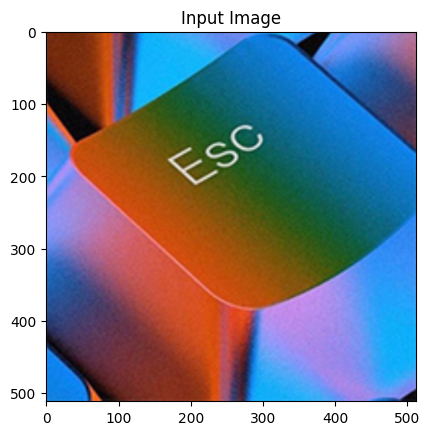

In [54]:
input_img = content_img.clone()
# if you want to use white noise instead uncomment the below line:
# input_img = torch.randn(content_img.data.size(), device=device)

# here we add the original input image to the figure:
plt.figure()
imshow(input_img, title='Input Image')

In [45]:
def get_input_optimizer(input_img):
    optimizer = optim.LBFGS([input_img])
    return optimizer

In [64]:
def run_style_transfer(cnn, normalization_mean, normalization_std,
                       content_img, style_img, input_img, num_steps=400,
                       style_weight=1000000, content_weight=1):
    """Run the style transfer."""
    print('Building the style transfer model..')
    model, style_losses, content_losses = get_style_model_and_losses(cnn,
        normalization_mean, normalization_std, style_img, content_img)

    # We want to optimize the input and not the model parameters so we
    # update all the requires_grad fields accordingly
    input_img.requires_grad_(True)
    model.requires_grad_(False)

    optimizer = get_input_optimizer(input_img)

    print('Optimizing..')
    run = [0]
    while run[0] <= num_steps:

        def closure():
            # correct the values of updated input image
            with torch.no_grad():
                input_img.clamp_(0, 1)

            optimizer.zero_grad()
            model(input_img)
            style_score = 0
            content_score = 0

            for sl in style_losses:
                style_score += sl.loss
            for cl in content_losses:
                content_score += cl.loss

            style_score *= style_weight
            content_score *= content_weight

            loss = style_score + content_score
            loss.backward()

            run[0] += 1
            if run[0] % 50 == 0:
                print("run {}:".format(run))
                print('Style Loss : {:4f} Content Loss: {:4f}'.format(
                    style_score.item(), content_score.item()))
                print()

            return style_score + content_score

        optimizer.step(closure)

    # a last correction...
    with torch.no_grad():
        input_img.clamp_(0, 1)

    return input_img

Building the style transfer model..
Optimizing..


<ipython-input-42-9d0e31e1cc8b>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
<ipython-input-42-9d0e31e1cc8b>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


run [50]:
Style Loss : 31.988733 Content Loss: 72.842720

run [100]:
Style Loss : 25.143116 Content Loss: 72.565865

run [150]:
Style Loss : 25.187098 Content Loss: 72.660355

run [200]:
Style Loss : 16.128441 Content Loss: 72.415810

run [250]:
Style Loss : 13.007679 Content Loss: 72.184669

run [300]:
Style Loss : 11.244533 Content Loss: 72.290253

run [350]:
Style Loss : 8.183450 Content Loss: 71.968208

run [400]:
Style Loss : 18.846743 Content Loss: 71.833527

run [450]:
Style Loss : 6.215176 Content Loss: 71.511902

run [500]:
Style Loss : 14.250660 Content Loss: 72.206696



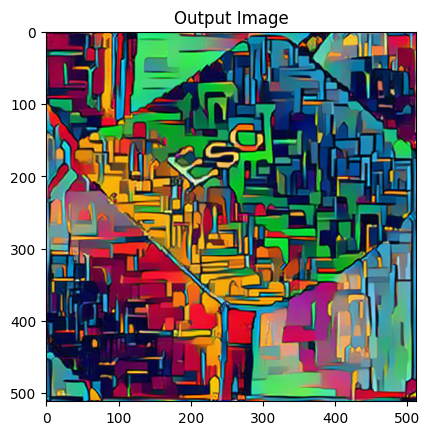

In [57]:
output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img)

plt.figure()
imshow(output, title='Output Image')

# sphinx_gallery_thumbnail_number = 4
plt.ioff()
plt.show()

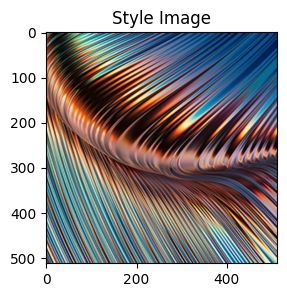

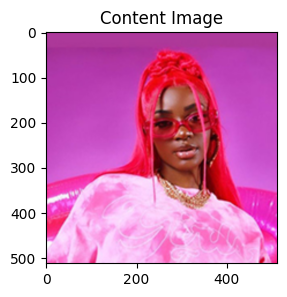

In [69]:
style_img2 = image_loader("/content/sample_data/images/style_image3.jpg")
content_img2 = image_loader("/content/sample_data/images/art_image3.jpg")

unloader = transforms.ToPILImage()  # reconvert into PIL image

plt.ion()

def imshow(tensor, title=None):
    image = tensor.cpu().clone()  # we clone the tensor to not do changes on it
    image = image.squeeze(0)      # remove the fake batch dimension
    image = unloader(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) # pause a bit so that plots are updated


plt.figure(figsize=(3,3))
imshow(style_img2, title='Style Image')

plt.figure(figsize=(3,3))
imshow(content_img2, title='Content Image')

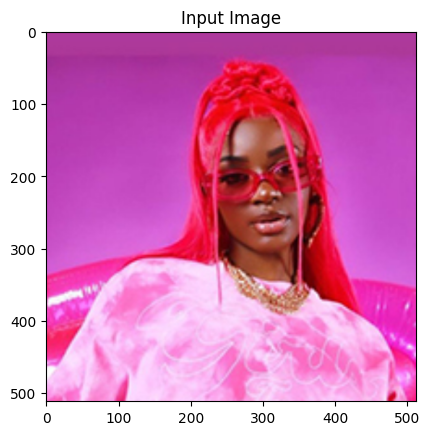

In [70]:
input_img2 = content_img2.clone()
plt.figure()
imshow(input_img2, title='Input Image')

Building the style transfer model..
Optimizing..


<ipython-input-42-9d0e31e1cc8b>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
<ipython-input-42-9d0e31e1cc8b>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


run [50]:
Style Loss : 1292.875122 Content Loss: 60.811615

run [100]:
Style Loss : 313.157928 Content Loss: 61.900597

run [150]:
Style Loss : 163.839264 Content Loss: 62.214470

run [200]:
Style Loss : 99.018799 Content Loss: 62.584206

run [250]:
Style Loss : 67.746468 Content Loss: 62.844570

run [300]:
Style Loss : 46.948410 Content Loss: 63.125565

run [350]:
Style Loss : 48.219799 Content Loss: 63.069233

run [400]:
Style Loss : 23.378332 Content Loss: 62.692749



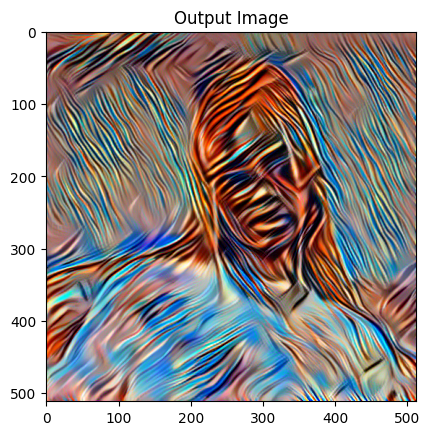

In [66]:
output2 = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img2, style_img2, input_img2)

plt.figure()
imshow(output2, title='Output Image')

# sphinx_gallery_thumbnail_number = 4
plt.ioff()
plt.show()